In [1]:
import pandas as pd
import numpy as np
import bbgclient
import dfutils
import datetime
import bbgclient
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import math

In [2]:
def last_elem_or_null(ts):
    if ts is None: return None
    if len(ts) == 0: return None
    return ts.iloc[-1]

In [3]:
historical_data = pd.read_csv('DutchTenders.csv', nrows = 25) #133

In [4]:
historical_data

,Ticker,Announced,Expiration,Min Price ($),Max Price,Min Shares,Max Shares,Min Value ($),Max Value ($),Shares Tendered at Acceptance Price,Total Shares Tendered (not usually given,Price Paid,Shares Purchased
0,DVA US,3/15/2002,5/30/2002,21.00,25.00,15.0,15.0,315.0,375.0,19.3,NaN,24.00,16.7
1,920479Q US,5/9/2002,6/14/2002,20.50,22.50,4.0,4.0,82.0,90.0,4.7,NaN,21.38,4.0
2,ENR US,8/5/2002,8/30/2002,25.50,29.00,6.0,6.0,153.0,174.0,2.6,2.6,29.00,2.6
3,ASNA US,9/19/2002,10/18/2002,15.00,17.00,8.0,8.0,120.0,136.0,9.2,NaN,15.00,8.0
4,KEYN US,10/29/2002,11/26/2002,7.00,8.00,10.0,10.0,70.0,80.0,4.3,4.3,8.00,4.3
5,SFSW US,10/30/2002,12/6/2002,14.00,16.50,0.7,0.7,9.8,11.6,0.7,0.7,16.50,0.7
6,RAH US,11/11/2002,12/11/2002,21.00,24.00,4.0,4.0,84.0,96.0,1.1,1.1,24.00,1.1
7,BF/B US,2/3/2003,3/4/2003,63.00,73.00,6.8,6.8,428.4,496.4,7.7,NaN,70.50,7.6
8,TYL US,4/14/2003,5/12/2003,3.60,4.00,4.2,4.2,15.1,16.8,6.0,6.0,4.00,5.1
9,AOT US,4/23/2003,5/21/2003,15.00,17.50,15.0,15.0,225.0,262.5,6.0,6.0,17.50,6.0


In [5]:
historical_data['Announced'] = historical_data['Announced'].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y'))
historical_data['Expiration'] = historical_data['Expiration'].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y'))

In [6]:
pre_deal_dt, five_days_before_exp, post_exp, duration = [], [], [], []
for i in range(0, len(historical_data)):
    pre_deal_dt.append(historical_data['Announced'][i] - datetime.timedelta(days = 1))
    five_days_before_exp.append(historical_data['Expiration'][i] - datetime.timedelta(days = 5))
    post_exp.append(historical_data['Expiration'][i] + datetime.timedelta(days = 1))
    duration.append(pd.bdate_range(historical_data['Announced'][i], historical_data['Expiration'][i]).size)
    
historical_data['Pre-Deal Date'] = pre_deal_dt
historical_data['5-Days Before Expiration Date'] = five_days_before_exp
historical_data['Post Expiration Date'] = post_exp
historical_data['Duration'] = duration

In [7]:
historical_data

,Ticker,Announced,Expiration,Min Price ($),Max Price,Min Shares,Max Shares,Min Value ($),Max Value ($),Shares Tendered at Acceptance Price,Total Shares Tendered (not usually given,Price Paid,Shares Purchased,Pre-Deal Date,5-Days Before Expiration Date,Post Expiration Date,Duration
0,DVA US,2002-03-15,2002-05-30,21.00,25.00,15.0,15.0,315.0,375.0,19.3,NaN,24.00,16.7,2002-03-14,2002-05-25,2002-05-31,55
1,920479Q US,2002-05-09,2002-06-14,20.50,22.50,4.0,4.0,82.0,90.0,4.7,NaN,21.38,4.0,2002-05-08,2002-06-09,2002-06-15,27
2,ENR US,2002-08-05,2002-08-30,25.50,29.00,6.0,6.0,153.0,174.0,2.6,2.6,29.00,2.6,2002-08-04,2002-08-25,2002-08-31,20
3,ASNA US,2002-09-19,2002-10-18,15.00,17.00,8.0,8.0,120.0,136.0,9.2,NaN,15.00,8.0,2002-09-18,2002-10-13,2002-10-19,22
4,KEYN US,2002-10-29,2002-11-26,7.00,8.00,10.0,10.0,70.0,80.0,4.3,4.3,8.00,4.3,2002-10-28,2002-11-21,2002-11-27,21
5,SFSW US,2002-10-30,2002-12-06,14.00,16.50,0.7,0.7,9.8,11.6,0.7,0.7,16.50,0.7,2002-10-29,2002-12-01,2002-12-07,28
6,RAH US,2002-11-11,2002-12-11,21.00,24.00,4.0,4.0,84.0,96.0,1.1,1.1,24.00,1.1,2002-11-10,2002-12-06,2002-12-12,23
7,BF/B US,2003-02-03,2003-03-04,63.00,73.00,6.8,6.8,428.4,496.4,7.7,NaN,70.50,7.6,2003-02-02,2003-02-27,2003-03-05,22
8,TYL US,2003-04-14,2003-05-12,3.60,4.00,4.2,4.2,15.1,16.8,6.0,6.0,4.00,5.1,2003-04-13,2003-05-07,2003-05-13,21
9,AOT US,2003-04-23,2003-05-21,15.00,17.50,15.0,15.0,225.0,262.5,6.0,6.0,17.50,6.0,2003-04-22,2003-05-16,2003-05-22,21


In [8]:
historical_data['Value Repurchased'] = historical_data['Price Paid'] * historical_data['Shares Purchased']
historical_data['Proration Based on Total Shares'] = historical_data['Shares Purchased']/historical_data['Shares Tendered at Acceptance Price']
#historical_data['Proration Based on Announced Shares'] - uses the upsided options

In [9]:
slicer = dfutils.df_slicer()
shares_out, pct_insider_os, shares_not_including_insiders, adj_size, particip_at_accep = [], [], [], [], []
for i in range(0, len(historical_data)):
    start = historical_data['Announced'][i].strftime('%Y%m%d')
    start = datetime.datetime.strptime(start, '%Y%m%d')
    pct_insider_shares_out = last_elem_or_null(bbgclient.bbgclient.get_timeseries(historical_data["Ticker"][i]+" Equity", 'EQY_SH_OUT', slicer.prev_n_business_days(10,start).strftime('%Y%m%d'), historical_data['Announced'][i].strftime('%Y%m%d')))
    pct_insider_os.append(pct_insider_shares_out)
    shares_out_total = last_elem_or_null(bbgclient.bbgclient.get_timeseries(historical_data["Ticker"][i]+" Equity", 'EQY_SH_OUT', slicer.prev_n_business_days(10,start).strftime('%Y%m%d'), historical_data['Announced'][i].strftime('%Y%m%d')))
    shares_out.append(shares_out_total)
    #shares elgible for tender- subtract the insider amount
    eligible_for_tender = shares_out_total*(1-(pct_insider_shares_out)/100)
    shares_not_including_insiders.append(eligible_for_tender)
    #Adjusted Relative Size
    adj_size.append((0.5*(historical_data['Min Shares'][i]+historical_data['Max Shares '][i]))/eligible_for_tender)
    particip_at_accep.append(historical_data['Shares Tendered at Acceptance Price'][i]/eligible_for_tender)
     
historical_data['Total Shares O/S'] = shares_out
historical_data['Percent Insider O/S'] = pct_insider_os
historical_data['Total Shares Eligible for Repurchase'] = shares_not_including_insiders
historical_data['Adj Relative Size'] = adj_size
historical_data['Participation at Acceptance Price (%)'] = particip_at_accep

In [10]:
historical_data

,Ticker,Announced,Expiration,Min Price ($),Max Price,Min Shares,Max Shares,Min Value ($),Max Value ($),Shares Tendered at Acceptance Price,...,5-Days Before Expiration Date,Post Expiration Date,Duration,Value Repurchased,Proration Based on Total Shares,Total Shares O/S,Percent Insider O/S,Total Shares Eligible for Repurchase,Adj Relative Size,Participation at Acceptance Price (%)
0,DVA US,2002-03-15,2002-05-30,21.00,25.00,15.0,15.0,315.0,375.0,19.3,...,2002-05-25,2002-05-31,55,400.80,0.865285,247.137,247.137,-363.629968,-0.041251,-0.053076
1,920479Q US,2002-05-09,2002-06-14,20.50,22.50,4.0,4.0,82.0,90.0,4.7,...,2002-06-09,2002-06-15,27,85.52,0.851064,24.755,24.755,18.626900,0.214743,0.252323
2,ENR US,2002-08-05,2002-08-30,25.50,29.00,6.0,6.0,153.0,174.0,2.6,...,2002-08-25,2002-08-31,20,75.40,1.000000,NaN,NaN,NaN,NaN,NaN
3,ASNA US,2002-09-19,2002-10-18,15.00,17.00,8.0,8.0,120.0,136.0,9.2,...,2002-10-13,2002-10-19,22,120.00,0.869565,145.994,145.994,-67.148480,-0.119139,-0.137010
4,KEYN US,2002-10-29,2002-11-26,7.00,8.00,10.0,10.0,70.0,80.0,4.3,...,2002-11-21,2002-11-27,21,34.40,1.000000,28.490,28.490,20.373199,0.490841,0.211062
5,SFSW US,2002-10-30,2002-12-06,14.00,16.50,0.7,0.7,9.8,11.6,0.7,...,2002-12-01,2002-12-07,28,11.55,1.000000,7.705,7.705,7.111330,0.098434,0.098434
6,RAH US,2002-11-11,2002-12-11,21.00,24.00,4.0,4.0,84.0,96.0,1.1,...,2002-12-06,2002-12-12,23,26.40,1.000000,30.026,30.026,21.010393,0.190382,0.052355
7,BF/B US,2003-02-03,2003-03-04,63.00,73.00,6.8,6.8,428.4,496.4,7.7,...,2003-02-27,2003-03-05,22,535.80,0.987013,370.582,370.582,-1002.728187,-0.006781,-0.007679
8,TYL US,2003-04-14,2003-05-12,3.60,4.00,4.2,4.2,15.1,16.8,6.0,...,2003-05-07,2003-05-13,21,20.40,0.850000,45.723,45.723,24.817073,0.169238,0.241769
9,AOT US,2003-04-23,2003-05-21,15.00,17.50,15.0,15.0,225.0,262.5,6.0,...,2003-05-16,2003-05-22,21,105.00,1.000000,105.200,105.200,-5.470400,-2.742030,-1.096812


In [11]:
pricing_df = pd.DataFrame()

pricing_df['Ticker'] = historical_data["Ticker"]

pre_deal_price, announcement_price, five_days_before_exp_price, exp_price, post_exp_price = [], [], [], [], []
spx_on_announcement, spx_on_exp, vix_on_exp = [], [], []  
for i in range(0,len(pricing_df)):
    start1 = historical_data['Pre-Deal Date'][i].strftime('%Y%m%d')
    start1 = datetime.datetime.strptime(start1, '%Y%m%d')
    start2 = historical_data['Announced'][i].strftime('%Y%m%d')
    start2 = datetime.datetime.strptime(start2, '%Y%m%d')
    start3 = historical_data['5-Days Before Expiration Date'][i].strftime('%Y%m%d')
    start3 = datetime.datetime.strptime(start3, '%Y%m%d')
    start4 = historical_data['Expiration'][i].strftime('%Y%m%d')
    start4 = datetime.datetime.strptime(start4, '%Y%m%d')
    start5 = historical_data['Post Expiration Date'][i].strftime('%Y%m%d')
    start5 = datetime.datetime.strptime(start5, '%Y%m%d')
    
    pre_deal_price.append(last_elem_or_null(bbgclient.bbgclient.get_timeseries(historical_data["Ticker"][i]+" Equity", 'PX_LAST', slicer.prev_n_business_days(10,start1).strftime('%Y%m%d'), historical_data['Pre-Deal Date'][i].strftime('%Y%m%d'))))
    announcement_price.append(last_elem_or_null(bbgclient.bbgclient.get_timeseries(historical_data["Ticker"][i]+" Equity", 'PX_LAST', slicer.prev_n_business_days(10,start2).strftime('%Y%m%d'), historical_data['Announced'][i].strftime('%Y%m%d'))))
    five_days_before_exp_price.append(last_elem_or_null(bbgclient.bbgclient.get_timeseries(historical_data["Ticker"][i]+" Equity", 'PX_LAST', slicer.prev_n_business_days(10,start3).strftime('%Y%m%d'), historical_data['5-Days Before Expiration Date'][i].strftime('%Y%m%d'))))
    exp_price.append(last_elem_or_null(bbgclient.bbgclient.get_timeseries(historical_data["Ticker"][i]+" Equity", 'PX_LAST', slicer.prev_n_business_days(10,start4).strftime('%Y%m%d'), historical_data['Expiration'][i].strftime('%Y%m%d'))))
    post_exp_price.append(last_elem_or_null(bbgclient.bbgclient.get_timeseries(historical_data["Ticker"][i]+" Equity", 'PX_LAST', slicer.prev_n_business_days(10,start5).strftime('%Y%m%d'), historical_data['Post Expiration Date'][i].strftime('%Y%m%d'))))
    
    spx_on_announcement.append(last_elem_or_null(bbgclient.bbgclient.get_timeseries("SPX INDEX", 'PX_LAST', slicer.prev_n_business_days(10,start2).strftime('%Y%m%d'), historical_data['Announced'][i].strftime('%Y%m%d'))))
    spx_on_exp.append(last_elem_or_null(bbgclient.bbgclient.get_timeseries('SPX INDEX', 'PX_LAST', slicer.prev_n_business_days(10,start4).strftime('%Y%m%d'), historical_data['Expiration'][i].strftime('%Y%m%d'))))
    vix_on_exp.append(last_elem_or_null(bbgclient.bbgclient.get_timeseries('VIX INDEX', 'PX_LAST', slicer.prev_n_business_days(10,start4).strftime('%Y%m%d'), historical_data['Expiration'][i].strftime('%Y%m%d'))))
    #vix implied vol- need something else to get this
    

In [12]:
pricing_df['Pre-Deal Price'] = pre_deal_price
pricing_df['Announcement Price'] = announcement_price
pricing_df['5-Days Before Annoucnement Price'] = five_days_before_exp_price
pricing_df['Expiration Price'] = exp_price
pricing_df['Post Expiration Price'] = post_exp_price

pricing_df['SPX Price on Announcement'] = spx_on_announcement
pricing_df['SPX Price on Expiration'] = spx_on_exp
pricing_df['VIX Price on Expiration'] = vix_on_exp

In [13]:
pricing_df

,Ticker,Pre-Deal Price,Announcement Price,5-Days Before Annoucnement Price,Expiration Price,Post Expiration Price,SPX Price on Announcement,SPX Price on Expiration,VIX Price on Expiration
0,DVA US,7.6400,8.4900,7.4200,7.7667,7.8000,1166.15,1064.66,20.61
1,920479Q US,20.2300,21.5900,21.0000,21.2500,21.2500,1073.01,1007.27,25.96
2,ENR US,NaN,NaN,NaN,NaN,NaN,834.60,916.07,32.64
3,ASNA US,2.8225,3.8125,3.7575,3.9050,3.9050,843.32,884.39,33.53
4,KEYN US,7.2900,7.7200,8.1800,7.9500,8.2290,882.15,913.31,25.97
5,SFSW US,14.5750,15.9500,16.2200,16.3500,16.3500,890.71,912.23,28.88
6,RAH US,17.2166,19.3369,20.4394,20.5666,20.7787,876.19,904.96,27.76
7,BF/B US,6.6283,7.4763,7.5477,7.3173,7.4293,860.32,821.99,31.83
8,TYL US,3.6100,3.8500,4.0300,4.0900,3.9700,885.23,945.11,19.52
9,AOT US,15.8700,17.1500,17.5200,17.5000,18.0400,919.02,923.42,21.21


In [14]:
trading_stats_df = pd.DataFrame()

trading_stats_df['Ticker'] = historical_data["Ticker"]

tender_premium_pct_low, tender_premium_pct_high, pro_rate_low, pro_rate_high, pre_deal_vol = [], [], [], [], []

for i in range(0, len(trading_stats_df)):
    start = historical_data['Pre-Deal Date'][i].strftime('%Y%m%d')
    start = datetime.datetime.strptime(start,'%Y%m%d')
    tender_premium_pct_low.append(None if (historical_data['Min Price ($)'][i]/pricing_df['Pre-Deal Price'][i])-1 == -1 else (historical_data['Min Price ($)'][i]/pricing_df['Pre-Deal Price'][i])-1)
    tender_premium_pct_high.append(None if (historical_data['Max Price'][i]/pricing_df['Pre-Deal Price'][i])-1 == -1 else (historical_data['Max Price'][i]/pricing_df['Pre-Deal Price'][i])-1)
    pro_rate_low.append(historical_data['Min Shares'][i]/historical_data["Total Shares Eligible for Repurchase"][i]) #Only want to use the shares eligible to participate in the tender
    pro_rate_high.append(historical_data['Max Shares '][i]/historical_data['Total Shares Eligible for Repurchase'][i])
    pre_deal_vol.append(last_elem_or_null(bbgclient.bbgclient.get_timeseries(historical_data["Ticker"][i]+" Equity", 'VOLATILITY_60D', slicer.prev_n_business_days(10,start).strftime('%Y%m%d'), historical_data['Pre-Deal Date'][i].strftime('%Y%m%d'))))
    

In [15]:
trading_stats_df['Tender Premium % @ Min Price'] = tender_premium_pct_low
trading_stats_df['Tender Premium % @ Max Price'] = tender_premium_pct_high
trading_stats_df['Pro-Rate @ Min Shares'] = pro_rate_low
trading_stats_df['Pro-Rate @ Max Shares'] = pro_rate_high
trading_stats_df['Implied Pre-Deal Vol (60D)'] = pre_deal_vol

In [16]:
stock_apprec_over_tender_per, stock_change_on_annc_day, stock_change_post_exp, spx_change_over_tender_per, stock_vs_spx_over_tender_per = [], [], [], [], []

for i in range(0, len(trading_stats_df)):
    apprec_over_tp = (pricing_df['Expiration Price'][i]/pricing_df['Announcement Price'][i])-1
    spx_over_tp = (pricing_df['SPX Price on Expiration'][i]/pricing_df['SPX Price on Announcement'][i])-1
    stock_apprec_over_tender_per.append(apprec_over_tp)
    stock_change_on_annc_day.append((pricing_df['Announcement Price'][i]/pricing_df['Pre-Deal Price'][i])-1)
    stock_change_post_exp.append((pricing_df['Post Expiration Price'][i]/pricing_df['Expiration Price'][i])-1)
    spx_change_over_tender_per.append(spx_over_tp)
    stock_vs_spx_over_tender_per.append(apprec_over_tp - spx_over_tp)
    

In [17]:
trading_stats_df['Stock Appreciation Over Tender Period'] = stock_apprec_over_tender_per
trading_stats_df['Stock Change on Announcement'] = stock_change_on_annc_day
trading_stats_df['Stock Change Post Expiration'] = stock_change_post_exp
trading_stats_df['Change in SPX Over Tender Period'] = spx_change_over_tender_per
trading_stats_df['Stock vs. SPX Over Tender Period'] = stock_vs_spx_over_tender_per

In [18]:
excess_volume, excess_volume_avg_30D, excess_vol_vs_historical_avg, excess_vol_avg_shares_to_be_purchased = [], [], [], []

for i in range(0, len(historical_data)):
    start = historical_data['Pre-Deal Date'][i].strftime('%Y%m%d')
    start = datetime.datetime.strptime(start, '%Y%m%d')
    excess_vol = last_elem_or_null(bbgclient.bbgclient.get_timeseries(historical_data['Ticker'][i]+" Equity", 'PX_VOLUME', slicer.prev_n_business_days(10,start).strftime('%Y%m%d'), historical_data['Pre-Deal Date'][i].strftime('%Y%m%d')))
    #excess_vol_avg = last_elem_or_null(bbgclient.bbgclient.get_timeseries(historical_data['Ticker'][i]+" Equity", 'VOLUME_AVG_30D', slicer.prev_n_business_days(10,start).strftime('%Y%m%d'), historical_data['Pre-Deal Date'][i].strftime('%Y%m%d')))
    excess_volume.append(excess_vol)
    #excess_volume_avg_30D.append(excess_vol_avg)
    #excess_vol_vs_historical_avg.append(excess_vol/excess_vol_avg)
    excess_vol_avg_shares_to_be_purchased = excess_vol/(0.5*(historical_data['Min Shares']+historical_data['Max Shares ']))

In [19]:
trading_stats_df['Excess Volume'] = excess_volume
#trading_stats_df['Historical Excess Volume 30D'] = excess_volume_avg_30D
#trading_stats_df['Excess Vol vs. Historical Average'] = excess_vol_vs_historical_avg
trading_stats_df['Total Excess Volume/Avg Shares to be Repurchased'] = excess_vol_avg_shares_to_be_purchased

In [20]:
trading_stats_df

,Ticker,Tender Premium % @ Min Price,Tender Premium % @ Max Price,Pro-Rate @ Min Shares,Pro-Rate @ Max Shares,Implied Pre-Deal Vol (60D),Stock Appreciation Over Tender Period,Stock Change on Announcement,Stock Change Post Expiration,Change in SPX Over Tender Period,Stock vs. SPX Over Tender Period,Excess Volume,Total Excess Volume/Avg Shares to be Repurchased
0,DVA US,1.748691,2.272251,-0.041251,-0.041251,29.461,-0.085194,0.111257,0.004288,-0.087030,0.001836,1423500.0,2.356800e+05
1,920479Q US,0.013347,0.112210,0.214743,0.214743,27.589,-0.015748,0.067227,0.000000,-0.061267,0.045519,526500.0,8.838000e+05
2,ENR US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097616,NaN,NaN,5.892000e+05
3,ASNA US,4.314438,5.023029,-0.119139,-0.119139,80.657,0.024262,0.350753,0.000000,0.048700,-0.024438,288400.0,4.419000e+05
4,KEYN US,-0.039781,0.097394,0.490841,0.490841,47.277,0.029793,0.058985,0.035094,0.035323,-0.005530,170382.0,3.535200e+05
5,SFSW US,-0.039451,0.132075,0.098434,0.098434,17.306,0.025078,0.094340,0.000000,0.024161,0.000918,8500.0,5.050286e+06
6,RAH US,0.219753,0.394003,0.190382,0.190382,40.122,0.063593,0.123154,0.010313,0.032835,0.030758,156800.0,8.838000e+05
7,BF/B US,8.504700,10.013382,-0.006781,-0.006781,22.927,-0.021267,0.127936,0.015306,-0.044553,0.023286,1242188.0,5.198824e+05
8,TYL US,-0.002770,0.108033,0.169238,0.169238,52.159,0.062338,0.066482,-0.029340,0.067643,-0.005306,38000.0,8.417143e+05
9,AOT US,-0.054820,0.102710,-2.742030,-2.742030,27.793,0.020408,0.080655,0.030857,0.004788,0.015620,417600.0,2.356800e+05


In [21]:
final_df = pd.merge(pd.merge(historical_data, pricing_df, on = 'Ticker'),trading_stats_df, on = 'Ticker')
final_df

,Ticker,Announced,Expiration,Min Price ($),Max Price,Min Shares,Max Shares,Min Value ($),Max Value ($),Shares Tendered at Acceptance Price,...,Pro-Rate @ Min Shares,Pro-Rate @ Max Shares,Implied Pre-Deal Vol (60D),Stock Appreciation Over Tender Period,Stock Change on Announcement,Stock Change Post Expiration,Change in SPX Over Tender Period,Stock vs. SPX Over Tender Period,Excess Volume,Total Excess Volume/Avg Shares to be Repurchased
0,DVA US,2002-03-15,2002-05-30,21.00,25.00,15.0,15.0,315.0,375.0,19.3,...,-0.041251,-0.041251,29.461,-0.085194,0.111257,0.004288,-0.087030,0.001836,1423500.0,2.356800e+05
1,920479Q US,2002-05-09,2002-06-14,20.50,22.50,4.0,4.0,82.0,90.0,4.7,...,0.214743,0.214743,27.589,-0.015748,0.067227,0.000000,-0.061267,0.045519,526500.0,8.838000e+05
2,ENR US,2002-08-05,2002-08-30,25.50,29.00,6.0,6.0,153.0,174.0,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.097616,NaN,NaN,5.892000e+05
3,ASNA US,2002-09-19,2002-10-18,15.00,17.00,8.0,8.0,120.0,136.0,9.2,...,-0.119139,-0.119139,80.657,0.024262,0.350753,0.000000,0.048700,-0.024438,288400.0,4.419000e+05
4,KEYN US,2002-10-29,2002-11-26,7.00,8.00,10.0,10.0,70.0,80.0,4.3,...,0.490841,0.490841,47.277,0.029793,0.058985,0.035094,0.035323,-0.005530,170382.0,3.535200e+05
5,SFSW US,2002-10-30,2002-12-06,14.00,16.50,0.7,0.7,9.8,11.6,0.7,...,0.098434,0.098434,17.306,0.025078,0.094340,0.000000,0.024161,0.000918,8500.0,5.050286e+06
6,RAH US,2002-11-11,2002-12-11,21.00,24.00,4.0,4.0,84.0,96.0,1.1,...,0.190382,0.190382,40.122,0.063593,0.123154,0.010313,0.032835,0.030758,156800.0,8.838000e+05
7,BF/B US,2003-02-03,2003-03-04,63.00,73.00,6.8,6.8,428.4,496.4,7.7,...,-0.006781,-0.006781,22.927,-0.021267,0.127936,0.015306,-0.044553,0.023286,1242188.0,5.198824e+05
8,TYL US,2003-04-14,2003-05-12,3.60,4.00,4.2,4.2,15.1,16.8,6.0,...,0.169238,0.169238,52.159,0.062338,0.066482,-0.029340,0.067643,-0.005306,38000.0,8.417143e+05
9,AOT US,2003-04-23,2003-05-21,15.00,17.50,15.0,15.0,225.0,262.5,6.0,...,-2.742030,-2.742030,27.793,0.020408,0.080655,0.030857,0.004788,0.015620,417600.0,2.356800e+05


In [22]:
final_df = final_df[final_df['Total Shares O/S'].notnull()]
final_df

,Ticker,Announced,Expiration,Min Price ($),Max Price,Min Shares,Max Shares,Min Value ($),Max Value ($),Shares Tendered at Acceptance Price,...,Pro-Rate @ Min Shares,Pro-Rate @ Max Shares,Implied Pre-Deal Vol (60D),Stock Appreciation Over Tender Period,Stock Change on Announcement,Stock Change Post Expiration,Change in SPX Over Tender Period,Stock vs. SPX Over Tender Period,Excess Volume,Total Excess Volume/Avg Shares to be Repurchased
0,DVA US,2002-03-15,2002-05-30,21.00,25.00,15.0,15.0,315.0,375.0,19.3,...,-0.041251,-0.041251,29.461,-0.085194,0.111257,0.004288,-0.087030,0.001836,1423500.0,2.356800e+05
1,920479Q US,2002-05-09,2002-06-14,20.50,22.50,4.0,4.0,82.0,90.0,4.7,...,0.214743,0.214743,27.589,-0.015748,0.067227,0.000000,-0.061267,0.045519,526500.0,8.838000e+05
3,ASNA US,2002-09-19,2002-10-18,15.00,17.00,8.0,8.0,120.0,136.0,9.2,...,-0.119139,-0.119139,80.657,0.024262,0.350753,0.000000,0.048700,-0.024438,288400.0,4.419000e+05
4,KEYN US,2002-10-29,2002-11-26,7.00,8.00,10.0,10.0,70.0,80.0,4.3,...,0.490841,0.490841,47.277,0.029793,0.058985,0.035094,0.035323,-0.005530,170382.0,3.535200e+05
5,SFSW US,2002-10-30,2002-12-06,14.00,16.50,0.7,0.7,9.8,11.6,0.7,...,0.098434,0.098434,17.306,0.025078,0.094340,0.000000,0.024161,0.000918,8500.0,5.050286e+06
6,RAH US,2002-11-11,2002-12-11,21.00,24.00,4.0,4.0,84.0,96.0,1.1,...,0.190382,0.190382,40.122,0.063593,0.123154,0.010313,0.032835,0.030758,156800.0,8.838000e+05
7,BF/B US,2003-02-03,2003-03-04,63.00,73.00,6.8,6.8,428.4,496.4,7.7,...,-0.006781,-0.006781,22.927,-0.021267,0.127936,0.015306,-0.044553,0.023286,1242188.0,5.198824e+05
8,TYL US,2003-04-14,2003-05-12,3.60,4.00,4.2,4.2,15.1,16.8,6.0,...,0.169238,0.169238,52.159,0.062338,0.066482,-0.029340,0.067643,-0.005306,38000.0,8.417143e+05
9,AOT US,2003-04-23,2003-05-21,15.00,17.50,15.0,15.0,225.0,262.5,6.0,...,-2.742030,-2.742030,27.793,0.020408,0.080655,0.030857,0.004788,0.015620,417600.0,2.356800e+05
10,RCII US,2003-04-28,2003-06-19,67.00,73.00,2.2,2.2,147.4,160.6,1.8,...,0.196255,0.196255,36.153,0.156042,0.042314,0.017421,0.087294,0.068748,1965998.0,1.606909e+06


In [23]:
data = pd.DataFrame({'Y': final_df['Participation at Acceptance Price (%)'], 'X1': final_df['Adj Relative Size'],
                    'X2': final_df['Tender Premium % @ Max Price'], 'X3': final_df['Stock Change Post Expiration'],
                    'X4': final_df['Total Excess Volume/Avg Shares to be Repurchased'], 
                    'X5': final_df['Stock Appreciation Over Tender Period'], 'X6': final_df['Stock Change on Announcement']})
data

,Y,X1,X2,X3,X4,X5,X6
0,-0.053076,-0.041251,2.272251,0.004288,2.356800e+05,-0.085194,0.111257
1,0.252323,0.214743,0.112210,0.000000,8.838000e+05,-0.015748,0.067227
3,-0.137010,-0.119139,5.023029,0.000000,4.419000e+05,0.024262,0.350753
4,0.211062,0.490841,0.097394,0.035094,3.535200e+05,0.029793,0.058985
5,0.098434,0.098434,0.132075,0.000000,5.050286e+06,0.025078,0.094340
6,0.052355,0.190382,0.394003,0.010313,8.838000e+05,0.063593,0.123154
7,-0.007679,-0.006781,10.013382,0.015306,5.198824e+05,-0.021267,0.127936
8,0.241769,0.169238,0.108033,-0.029340,8.417143e+05,0.062338,0.066482
9,-1.096812,-2.742030,0.102710,0.030857,2.356800e+05,0.020408,0.080655
10,0.160572,0.196255,2.016529,0.017421,1.606909e+06,0.156042,0.042314


In [24]:
model = sm.ols('Y~X1+X2+X3+X4+X5+X6', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     20.06
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           1.09e-07
Time:                        09:21:27   Log-Likelihood:                -10.749
No. Observations:                  28   AIC:                             35.50
Df Residuals:                      21   BIC:                             44.82
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1152      0.188     -0.614      0.546      -0.506       0.275
X1             0.7989      0.081      9.869      0.000       0.631       0.967
X2             0.0099      0.040      0.246      0.808      -0.073       0.093
X3             0.1113      4.166      0.027      0.979      -8.552       8.775
X4         -2.918e-09   7.49e-08     -0.039      0.969   -1.59e-07    1.53e-07
X5             1.4265      1.740      0.820      0.421      -2.192       5.045
X6             0.1296      0.976      0.133      0.896      -1.901       2.160
==============================================================================
Omnibus:                       18.606   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.141
Skew:                          -0.630   Prob(JB):                     3.25e-19
Kurtosis:                      11.449   Cond. No.                     9.08e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#RAMP DUTCH TENDER
slicer = dfutils.df_slicer()

In [26]:
ticker = 'RAMP US EQUITY'
announcement = '2018-11-13'
expiration = '2018-12-12'
min_price = 44.50
max_price = 49

annc_date = datetime.datetime.strptime(announcement,'%Y-%m-%d')
exp_date = datetime.datetime.strptime(expiration,'%Y-%m-%d')
pre_annc = annc_date - datetime.timedelta(days = 1)
post_exp = exp_date + datetime.timedelta(days = 1)

#slicer.prev_n_business_days(100,price_tgt_dt).strftime('%Y%m%d')
px_announcement = bbgclient.bbgclient.get_timeseries(ticker,'PX_LAST',annc_date.strftime('%Y%m%d'), annc_date.strftime('%Y%m%d'), {'BEST_FPERIOD_OVERRIDE': '1BF'})
px_expiration = bbgclient.bbgclient.get_timeseries("RAMP US EQUITY",'PX_LAST',exp_date.strftime('%Y%m%d'), exp_date.strftime('%Y%m%d'), {'BEST_FPERIOD_OVERRIDE': '1BF'})
px_through_tender_period = bbgclient.bbgclient.get_timeseries(ticker,'PX_LAST',annc_date.strftime('%Y%m%d'),exp_date.strftime('%Y%m%d'), {'BEST_FPERIOD_OVERRIDE': '1BF'})
trading_vol_through_offer = bbgclient.bbgclient.get_timeseries(ticker,'PX_VOLUME',annc_date.strftime('%Y%m%d'),exp_date.strftime('%Y%m%d'))

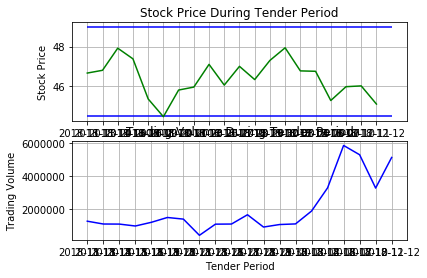

In [27]:
plt.subplot(2,1,1)
plt.plot(px_through_tender_period.index, px_through_tender_period, color = 'g')
plt.hlines([min_price,max_price], 0, len(px_through_tender_period), color = 'b', linestyles = 'solid')
plt.xlabel('Tender Period')
plt.ylabel('Stock Price')
plt.title('Stock Price During Tender Period')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(px_through_tender_period.index, trading_vol_through_offer, color = 'b')
plt.xlabel('Tender Period')
plt.ylabel('Trading Volume')
plt.title('Trading Volume During Tender Period')
plt.grid(True)

In [28]:
#Create stock price path simulation using historical data to predict where the price would have gone 
        ##in comparison to what it actually did
    ## Could we possibly use the simualted stock price paths to also model the potential trading volume

In [29]:
five_years_back = annc_date - relativedelta(years = 2)
price_data = bbgclient.bbgclient.get_timeseries(ticker, 'PX_LAST', five_years_back.strftime('%Y%m%d'), annc_date.strftime('%Y%m%d'), {'BEST_FPERIOD_OVERRIDE': '1BF'})

In [30]:
returns = []
for i in range(1,len(price_data)):
    returns.append((price_data[i]-price_data[i-1])/price_data[i-1])
    

In [31]:
u = np.mean(returns)
var = np.var(returns)
std = np.std(returns)

t = len(px_through_tender_period.index)
num_paths = 20
start_price = px_announcement[0]

price_paths = []
for i in range(0, num_paths):
    ind_price_path = []
    px_start = start_price
    ind_price_path.append(px_start)
    for k in range(1, t):
        next_price = px_start*np.exp((u-0.5*var)*k + std*np.random.normal(0,1)*math.sqrt(k))
        ind_price_path.append(next_price)
        px_start = next_price
        
    price_paths.append(ind_price_path)

In [32]:
#What percent of these sample price paths ended below the price on announcement
price_paths

[[46.66,
  45.69725728040076,
  46.49841821321842,
  47.202358057428064,
  47.464862955504266,
  46.29035361156813,
  46.7130941636657,
  44.274256877607215,
  41.00859416559145,
  42.39724861550785,
  43.10564871427871,
  42.49750556269354,
  42.816163512927105,
  42.216082128938105,
  46.0704946180675,
  41.161667078236725,
  39.112921284338995,
  37.68970450097524,
  42.72586478071726,
  46.27010194278443],
 [46.66,
  46.617022193027736,
  46.019900740176276,
  44.70157579620895,
  45.91116734092767,
  43.86821553104168,
  42.69333507629764,
  39.00169687513506,
  40.02852049336165,
  39.739762014992614,
  40.02231422218248,
  45.33199639294215,
  42.505170187519866,
  46.53898982145307,
  44.66687574288922,
  58.52917553992701,
  51.910276917771064,
  55.2114705089524,
  51.614801274883966,
  52.6114560201972],
 [46.66,
  46.75226395353163,
  48.400894489967634,
  47.839689467674965,
  47.804738272639185,
  51.03572018229862,
  46.10516596236402,
  45.68723489594503,
  47.418926406

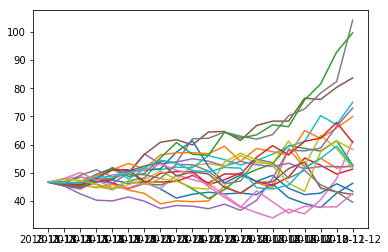

In [33]:
for i in range(0, num_paths):
    plt.plot(px_through_tender_period.index, price_paths[i])